In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("mega-2015.csv", header = 0)
df.head()

fix   G  GS    MP   FG  FGA    FG.   eFG.   FT  FTA  \
0     quincyacy  68  22  18.9  2.2  4.9  0.459  0.486  1.1  1.4   
1   jordanadams  30   0   8.3  1.2  2.9  0.407  0.465  0.5  0.8   
2   stevenadams  70  67  25.3  3.1  5.7  0.544  0.544  1.5  2.9   
3  alexisajinca  68   8  14.1  2.7  4.8  0.550  0.550  1.2  1.5   
4   colealdrich  61  16  16.0  2.4  4.9  0.478  0.478  0.8  1.0   

        ...        USG.  OWS  DWS   WS  WS.48  OBPM  DBPM  BPM  VORP  \
0       ...        15.5  1.0  0.7  1.7  0.063  -2.3  -0.8 -3.1  -0.3   
1       ...        20.4  0.0  0.4  0.4  0.073  -1.8   1.2 -0.6   0.1   
2       ...        14.3  1.9  2.2  4.1  0.111  -1.4   1.8  0.4   1.1   
3       ...        21.1  1.9  1.2  3.2  0.159  -0.5   0.6  0.2   0.5   
4       ...        18.3  0.8  1.4  2.2  0.107  -2.2   3.1  0.9   0.7   

   average salary  
0         1016155  
1         1404600  
2         2423849  
3         5050000  
4         1163944  

[5 rows x 39 columns]

# Top Variables from R Variable Selection Work
1. FG, VORP, DRB, BLK, G (Regular Linear Regression Model)

2. FG, MP, BPM, DWS, STL, BLK, G (cube root transform model)

3. FGA,FT,WS,TOV,GS,TRB,AST.,BLK,G,DRB.,DBPM,TRB.,STL.,ORB.,BLK. (TOP 16 Variables to give highest adjusted R^2 (regular model))

In [5]:
df1 = df[["fix","FG","VORP","DRB","BLK","G","average salary"]]
df1.head()

fix   FG  VORP  DRB  BLK   G  average salary
0     quincyacy  2.2  -0.3  3.3  0.3  68         1016155
1   jordanadams  1.2   0.1  0.6  0.2  30         1404600
2   stevenadams  3.1   1.1  4.6  1.2  70         2423849
3  alexisajinca  2.7   0.5  3.1  0.8  68         5050000
4   colealdrich  2.4   0.7  3.9  1.1  61         1163944

In [6]:
df2 = df[["fix","FG","MP","BPM","DWS","STL","BLK","G","average salary"]]
df2.head()

fix   FG    MP  BPM  DWS  STL  BLK   G  average salary
0     quincyacy  2.2  18.9 -3.1  0.7  0.4  0.3  68         1016155
1   jordanadams  1.2   8.3 -0.6  0.4  0.5  0.2  30         1404600
2   stevenadams  3.1  25.3  0.4  2.2  0.5  1.2  70         2423849
3  alexisajinca  2.7  14.1  0.2  1.2  0.3  0.8  68         5050000
4   colealdrich  2.4  16.0  0.9  1.4  0.6  1.1  61         1163944

# 2015 Salary Cap: 70,000,000
Now organize players based on % of salary cap
1. < 2% (min)
2. 2-4% (Vet Min)
3. 4-7% (MLE, Bi-annual)
4. 7-10%
5. 10-13%
6. 13-16%
7. 16-19%
8. /> 19% (Maxes)

In [8]:
def salGroup(x):
    yearCap = 70000000
    if x < 0.02*yearCap:
        return 1
    elif x >= 0.02*yearCap and x < 0.04*yearCap:
        return 2
    elif x >= 0.04*yearCap and x < 0.07*yearCap:
        return 3
    elif x >= 0.07*yearCap and x < 0.10*yearCap:
        return 4
    elif x >= 0.10*yearCap and x < 0.13*yearCap:
        return 5
    elif x >= 0.13*yearCap and x < 0.16*yearCap:
        return 6
    elif x >= 0.16*yearCap and x < 0.19*yearCap:
        return 7
    else:
        return 8

In [9]:
cols = df1.columns.drop('fix')
df1[cols] = df1[cols].apply(pd.to_numeric, errors = 'coerce')
df1["Cluster"] = df1['average salary'].apply(salGroup)
df1 = df1.drop('average salary',axis=1)
df1.head()

/home/konner/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/konner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


fix   FG  VORP  DRB  BLK   G  Cluster
0     quincyacy  2.2  -0.3  3.3  0.3  68        1
1   jordanadams  1.2   0.1  0.6  0.2  30        2
2   stevenadams  3.1   1.1  4.6  1.2  70        2
3  alexisajinca  2.7   0.5  3.1  0.8  68        4
4   colealdrich  2.4   0.7  3.9  1.1  61        1

In [10]:
cols = df2.columns.drop('fix')
df2[cols] = df2[cols].apply(pd.to_numeric, errors = 'coerce')
df2["Cluster"] = df2['average salary'].apply(salGroup)
df2 = df2.drop('average salary',axis=1)
df2.head()

/home/konner/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/konner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


fix   FG    MP  BPM  DWS  STL  BLK   G  Cluster
0     quincyacy  2.2  18.9 -3.1  0.7  0.4  0.3  68        1
1   jordanadams  1.2   8.3 -0.6  0.4  0.5  0.2  30        2
2   stevenadams  3.1  25.3  0.4  2.2  0.5  1.2  70        2
3  alexisajinca  2.7  14.1  0.2  1.2  0.3  0.8  68        4
4   colealdrich  2.4  16.0  0.9  1.4  0.6  1.1  61        1

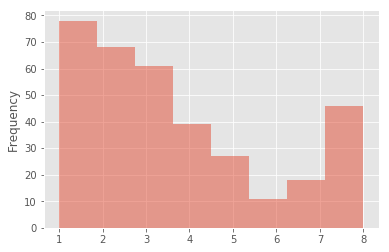

In [11]:
df1['Cluster'].plot.hist(8,alpha=0.5)
plt.show()

# Use Random Forests to Predict Cluster
## df1 (variables from regular linear regresison)

In [12]:
labels = np.asarray(df1.Cluster)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)

labels = le.transform(labels)
df_features = df1.to_dict(orient='records')

In [13]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
features = vec.fit_transform(df_features).toarray()

In [14]:
##### split up in test and training data ####
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(
	features, labels, 
	test_size=0.33, random_state=42)

In [15]:
#### Fit to random forests ####

# Random Forests Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
	min_samples_split=4,
	criterion="entropy"
	)

In [76]:
#from sklearn.svm import SVC
#clf = SVC()

In [16]:
clf.fit(features_train, labels_train)

# find the accuracy of the model
acc_test = clf.score(features_test, labels_test)
acc_train = clf.score(features_train, labels_train)
print ("Train Accuracy:", acc_train)
print ("Test Accuracy:", acc_test)

Train Accuracy: 0.978540772532
Test Accuracy: 0.695652173913


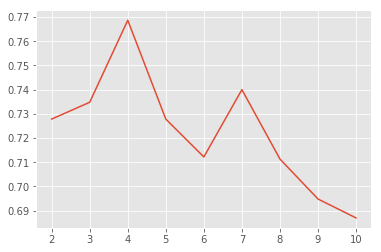

In [17]:
#Plot best splits
acc_tests = [0] * 9
acc_trains = [0] * 9
for e in range(10):
    for i in range(2,11):
        clf = RandomForestClassifier(
        min_samples_split=i,
        criterion="entropy"
        )
        clf.fit(features_train, labels_train)
        acc_tests[i-2] += clf.score(features_test, labels_test)
        acc_trains[i-2] += clf.score(features_train, labels_train)

acc_tests = [x/10 for x in acc_tests]
acc_trains = [x/10 for x in acc_trains]
x = np.arange(2,11,1)
plt.plot(x,acc_tests)
plt.show()

In [18]:
pred = clf.predict(features_test)
#### Figure out what kind of mistakes it makes ####
from sklearn.metrics import recall_score, precision_score

precision = precision_score(labels_test, pred, average="weighted")
recall = recall_score(labels_test, pred, average="weighted")

print ("Precision:", precision)
print ("Recall:", recall)

Precision: 0.604332223122
Recall: 0.582608695652


/home/konner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


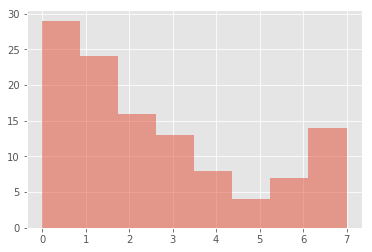

In [19]:
plt.hist(labels_test,8,alpha=0.5)
plt.show()

## df2 (transform)

In [20]:
labels = np.asarray(df2.Cluster)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)

labels = le.transform(labels)
df_features = df2.to_dict(orient='records')

In [21]:
vec = DictVectorizer()
features = vec.fit_transform(df_features).toarray()

In [22]:
features_train, features_test, labels_train, labels_test = train_test_split(
	features, labels, 
	test_size=0.33, random_state=42)

In [28]:
clf = RandomForestClassifier(
	min_samples_split=4,
	criterion="entropy"
	)

In [30]:
clf.fit(features_train, labels_train)

# find the accuracy of the model
acc_test = clf.score(features_test, labels_test)
acc_train = clf.score(features_train, labels_train)
print ("Train Accuracy:", acc_train)
print ("Test Accuracy:", acc_test)

Train Accuracy: 0.995708154506
Test Accuracy: 0.782608695652


# Mhmm

In [47]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)

In [53]:
pred = clf2.predict(features_test) + 1 # account for encoding
pred

array([1, 4, 4, 2, 3, 3, 8, 4, 3, 8, 8, 2, 1, 3, 3, 8, 3, 5, 1, 2, 4, 8, 2,
       3, 3, 8, 1, 3, 8, 2, 1, 1, 2, 2, 5, 3, 2, 3, 2, 3, 8, 1, 3, 8, 3, 1,
       7, 2, 1, 3, 3, 3, 3, 2, 2, 8, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 3, 1, 2,
       2, 2, 1, 3, 6, 1, 8, 5, 4, 2, 1, 2, 8, 8, 8, 5, 8, 2, 1, 1, 8, 3, 3,
       3, 2, 2, 4, 2, 3, 8, 2, 3, 2, 4, 1, 3, 2, 3, 3, 1, 8, 2, 3, 1, 7, 8])

In [70]:
df_features

[{'BLK': 0.3,
  'BPM': -3.1,
  'Cluster': 1,
  'DWS': 0.7,
  'FG': 2.2,
  'G': 68,
  'MP': 18.9,
  'STL': 0.4,
  'fix': 'quincyacy'},
 {'BLK': 0.2,
  'BPM': -0.6,
  'Cluster': 2,
  'DWS': 0.4,
  'FG': 1.2,
  'G': 30,
  'MP': 8.3,
  'STL': 0.5,
  'fix': 'jordanadams'},
 {'BLK': 1.2,
  'BPM': 0.4,
  'Cluster': 2,
  'DWS': 2.2,
  'FG': 3.1,
  'G': 70,
  'MP': 25.3,
  'STL': 0.5,
  'fix': 'stevenadams'},
 {'BLK': 0.8,
  'BPM': 0.2,
  'Cluster': 4,
  'DWS': 1.2,
  'FG': 2.7,
  'G': 68,
  'MP': 14.1,
  'STL': 0.3,
  'fix': 'alexisajinca'},
 {'BLK': 1.1,
  'BPM': 0.9,
  'Cluster': 1,
  'DWS': 1.4,
  'FG': 2.4,
  'G': 61,
  'MP': 16.0,
  'STL': 0.6,
  'fix': 'colealdrich'},
 {'BLK': 1.0,
  'BPM': 0.3,
  'Cluster': 8,
  'DWS': 3.7,
  'FG': 9.3,
  'G': 71,
  'MP': 35.4,
  'STL': 0.7,
  'fix': 'lamarcusaldridge'},
 {'BLK': 0.7,
  'BPM': 0.8,
  'Cluster': 3,
  'DWS': 1.6,
  'FG': 2.2,
  'G': 63,
  'MP': 17.0,
  'STL': 0.2,
  'fix': 'lavoyallen'},
 {'BLK': 0.5,
  'BPM': 3.3,
  'Cluster': 4,
  'DWS'

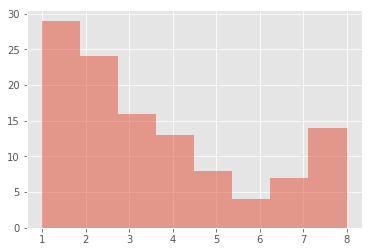

In [39]:
plt.hist(labels_test+1,8,alpha=0.5) # account for encoding
plt.show()

In [41]:
df2.head()

fix   FG    MP  BPM  DWS  STL  BLK   G  Cluster
0     quincyacy  2.2  18.9 -3.1  0.7  0.4  0.3  68        1
1   jordanadams  1.2   8.3 -0.6  0.4  0.5  0.2  30        2
2   stevenadams  3.1  25.3  0.4  2.2  0.5  1.2  70        2
3  alexisajinca  2.7  14.1  0.2  1.2  0.3  0.8  68        4
4   colealdrich  2.4  16.0  0.9  1.4  0.6  1.1  61        1

In [45]:
# predict our new player [FG,MP,BPM,DWS,STL,BLK,G]
player = [[2.2,18.9,-3.1,0.7,0.4,0.3,68]]
class_code = clf.predict(player) # [1]

decoded_class = le.inverse_transform(class_code)
print (decoded_class)

ValueError: Number of features of the model must match the input. Model n_features is 356 and input n_features is 7 